<a href="https://colab.research.google.com/github/DesiPilla/DSPS_dPilla/blob/master/HW9/higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Download Data from Kaggle

- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data


In [113]:
pip install kaggle

In [114]:
cd 'drive/My Drive/dsps'

[Errno 2] No such file or directory: 'drive/My Drive/dsps'
/content/drive/My Drive/dsps/kaggleHiggsBoson


In [0]:
!mkdir -p ~/.kaggle

In [116]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.zip      training.zip
random_submission.zip                    training.csv


In [117]:
cd kaggle

[Errno 2] No such file or directory: 'kaggle'
/content/drive/My Drive/dsps/kaggleHiggsBoson


In [118]:
cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [119]:
ls ~/.kaggle

kaggle.json


In [120]:
cd ~/.kaggle

/root/.kaggle


In [0]:
!chmod 600 kaggle.json

In [0]:
import json
import os

envs = json.load(open("kaggle.json", "r"))
os.environ["catherineharty"] = envs['username']
os.environ["824253b26696e60f3f970caa98c670cf"] = envs['key']

In [123]:
cd '../../content/drive/My Drive/dsps'

/content/drive/My Drive/dsps


In [124]:
!mkdir kaggleHiggsBoson

mkdir: cannot create directory ‘kaggleHiggsBoson’: File exists


In [125]:
cd kaggleHiggsBoson

/content/drive/My Drive/dsps/kaggleHiggsBoson


In [126]:
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16          10246  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16          11294  
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data                           4MB  2019-08-21 14:51:34           4851  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          3MB  2019-07-05 09:58:02           5807  
shuyangli94/food-com-recipes-and-user-interactions       Food.com Recipes and Interactio

In order to download the data, I had to accept the rules and verify my account on kaggle

In [127]:
!kaggle competitions download -c higgs-boson

random_submission.zip: Skipping, found more recently modified local copy (use --force to force download)
training.zip: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
HiggsBosonCompetition_AMSMetric_rev1.py: Skipping, found more recently modified local copy (use --force to force download)


In [128]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.zip      training.zip
random_submission.zip                    training.csv


## Prepare training data


- Read in the training data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [129]:
!unzip training.zip

Archive:  training.zip
replace training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [130]:
higgsData = pd.read_csv('training.csv')
weights = higgsData['Weight'].values
labels = higgsData['Label'].values
higgsData.drop(columns = ['Weight', 'Label'], inplace = True)

higgsData.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [131]:
higgsData.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [132]:
labels

array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)

In [133]:
weights

array([0.00265331, 2.23358449, 2.34738894, ..., 0.01863612, 1.68161144,
       1.87747381])

## Create models

In [0]:
# leave
from sklearn.model_selection import train_test_split 

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [135]:
#leave 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
# random_state parameter is the seed being used
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [0]:
gbt = GradientBoostingClassifier(random_state = 0)

Note: training the models takes some time. Especially the gradient boosted method

In [137]:
higgsData.reset_index(drop = True, inplace = True)
rfTrain, rfTest = train_test_split(higgsData, train_size = 0.75, random_state = 0)
rf.fit(rfTrain, labels[rfTrain.index]);

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [139]:
gbtTrain, gbtTest = train_test_split(higgsData, train_size = 0.75, random_state = 0)
gbt.fit(gbtTrain, labels[gbtTrain.index]);

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [140]:
rfScore = (rf.score(rfTrain, labels[rfTrain.index]), rf.score(rfTest, labels[rfTest.index]))
gbtScore = (gbt.score(gbtTrain, labels[gbtTrain.index]), gbt.score(gbtTest, labels[gbtTest.index]))

print('Random Forest Model Scores:\n    Training:\t%.2f%%\n    Test:\t%.2f%%' % (100*rfScore[0], 100*rfScore[1]))
print('\nGradient Boosting Model Scores:\n    Training:\t%.2f%%\n    Test:\t%.2f%%' % (100*gbtScore[0], 100*gbtScore[1]))

Random Forest Model Scores:
    Training:	98.79%
    Test:	82.34%

Gradient Boosting Model Scores:
    Training:	83.35%
    Test:	83.25%


## Compare models

- Produce a confusion matrix for each model and compare them


 



In [0]:

# I created this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, normalize=False, title='', cmap=plt.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    plt.xticks([0, 1], labels=["N", "P"])
    plt.ylim(-0.5,1.5)
    plt.yticks([0,1], labels=["N", "P"])    
    plt.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = plt.colorbar(im, cax=cax)

def confusion_matrix_numbers(model, data):
    predictP = model.predict(data) == 's'
    actualP = labels[data.index] == 's'
    predictN = model.predict(data) == 'b'
    actualN = labels[data.index] == 'b'

    PP = sum(predictP*actualP)
    NP = sum(predictN*actualP)
    NN = sum(predictN*actualN)
    PN = sum(predictP*actualN)

    print(tabulate([['NP: ' + str(NP), 'PP: ' + str(PP)], ['', ''], ['NN: ' + str(NN), 'PN: ' + str(PN)]]))
    accuracy = (PP + NN) / (PP + NN + NP + PN)
    print('The total accuracy of this model on the data is %.2f%%' % (100*accuracy))        

---------  ---------
NP: 7266   PP: 14118

NN: 37344  PN: 3772
---------  ---------
The total accuracy of this model on the data is 82.34%


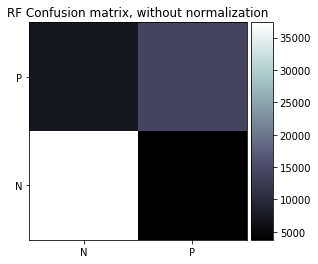

In [184]:
plot_confusion_matrix(y_true = labels[rfTest.index], y_pred = rf.predict(rfTest), title = 'RF')
confusion_matrix_numbers(rf, rfTest)

**Figure 1:** The confusion matrix for the RF model shows that the model was fairly accurate. In this matrix, *P* corresponds to an *s* label and *N* corresponds to a *b* label.

The *N-N* block is very white, meaning there were many instances (37,344) that were truly *b* that were correctly predicted to be *b*.

The hue of the *P-P* block falls around the middle range of the colorbar (14,118). This is darker than the *N-N* block, which means there were less instances that were truly *s* that were correctly predicted to be *s*. However, there were more *b* instances overall.

The *N-P* and *P-N* blocks are very dark. This means that there were very few instances (7,266 and 3,772) that were incorrectly predicted.

**Overall, 82.34% of the labels were correctly predicted.**


---------  ---------
NP: 6227   PP: 15157

NN: 36874  PN: 4242
---------  ---------
The total accuracy of this model on the data is 83.25%


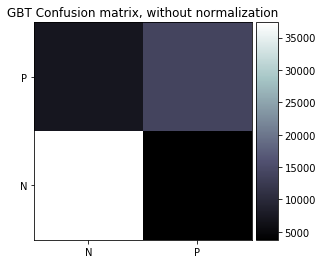

In [185]:
plot_confusion_matrix(y_true = labels[gbtTest.index], y_pred = rf.predict(gbtTest), title = 'GBT')
confusion_matrix_numbers(gbt, gbtTest)

**Figure 2:** The confusion matrix for the RF model shows that the model was fairly accurate. In this matrix, *P* corresponds to an *s* label and *N* corresponds to a *b* label.

The *N-N* block is very white, meaning there were many instances (36,874) that were truly *b* that were correctly predicted to be *b*.

The hue of the *P-P* block falls around the middle range of the colorbar (15,157
). This is darker than the *N-N* block, which means there were less instances that were truly *s* that were correctly predicted to be *s*. However, there were more *b* instances overall.

The *N-P* and *P-N* blocks are very dark. This means that there were very few instances (6,227 and 4,242) that were incorrectly predicted.

**Overall, 83.25% of the labels were correctly predicted.**


**Comparison**

The random forest and gradient boosted models both had similar accuracy on the testing data. The random forest model had an accuracy of **82.34%** on the test data, while the gradient boosted model had a slightly higher accuracy of **83.25%**.

## Predict the weights of the particles


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [0]:
traindata_weights, testdata_weights, train_weights, test_weights = ...

In [0]:
from sklearn.ensemble import RandomForestRegressor
rfR = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)
rfR.fit(...)
gbtR = ...
gbtR.fit(...)

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [0]:

print("L1 RF....."

L1 GBT 53154.297722502015


- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In [0]:
pprint(random_grid)


{'max_depth': [3, 10, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10, 100, 1000]}


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [0]:
higgsdata.iloc[:, best_features_index]

,PRI_tau_pt,DER_mass_vis,DER_mass_transverse_met_lep,DER_mass_MMC
0,32.638,97.827,51.655,138.470
1,42.014,103.235,68.768,160.937
2,32.154,125.953,162.172,-999.000
3,22.647,80.943,81.417,143.905
4,28.209,134.805,16.915,175.864
...,...,...,...,...
249995,24.754,36.548,71.989,-999.000
249996,23.416,68.083,58.179,-999.000
249997,35.636,75.839,60.526,105.457
249998,27.944,68.812,19.362,94.951


In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3, iid=False)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [0]:
random_search.fit(...
                  

In [0]:
print("Tuned RF  Parameters: {}".format(...))
print("Best score is {}".format(...))


In [0]:
df = pd.DataFrame(random_search.cv_results_)


In [0]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.162951,0.0518,0.103968,0.002995,100,sqrt,3,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.796656,0.79656,0.78728,0.79632,0.792703,0.793904,0.003627,1


# Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [0]:
rf.fit(traindata, train_label.values.flatten()=="s", max_depth.....)

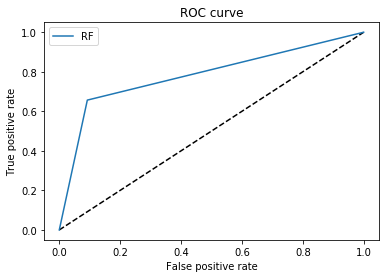

In [0]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf.predict_proba(testdata)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_label.values.flatten()=="s", rf.predict(testdata))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
